In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Функция для частичного EDA 

In [17]:
def EDA(df):
    information = df.info()
    print(information)
    null_value = df.isnull().sum()
    print(null_value)
    name_collumns = df.columns
    print(name_collumns)
    describe = df.describe()
    print(describe)
    correlation = df.corr()
    print(correlation)
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Index(['Unnamed: 0', 'Age', 'Sex'

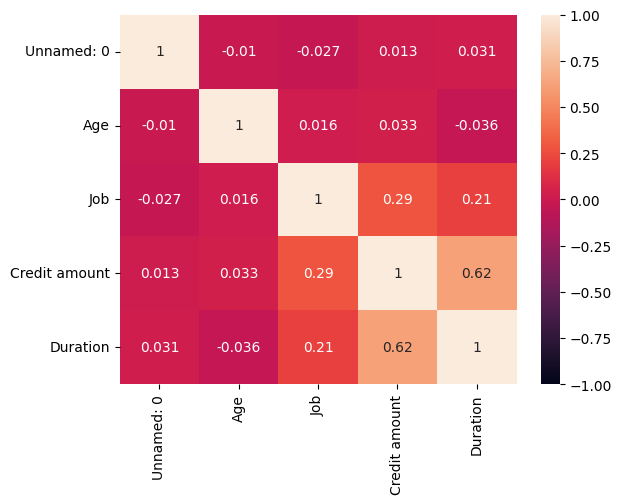

In [18]:
df = pd.read_csv('D:\Python\GB\german_credit_data.csv')
df.head()
EDA(df)

Приводим наши данные к подобающему виду

In [19]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Saving accounts'] = df['Saving accounts'].fillna('None')
df['Checking account'] = df['Checking account'].fillna('None')
df['Job'] = df['Job'].replace(
    {0: 'unskilled and non-resident', 1: 'unskilled and resident', 2: 'skilled', 3: 'highly skilled'})

In [20]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,None,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,None,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB
None
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64
Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose

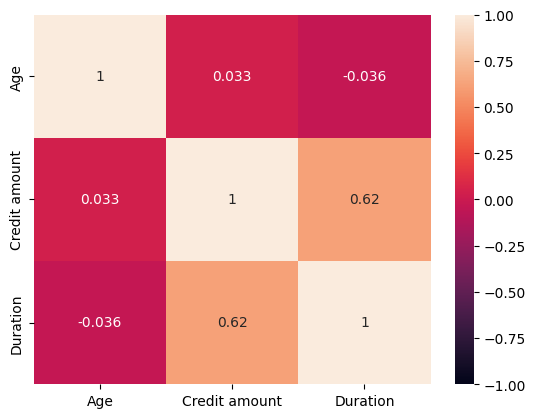

In [21]:
EDA(df)

После обработки данных наш частичный EDA дал удовлетворительные результаты.
Тепловая карта наглядно показывает, что присутствуют потенциально скоррелированные значения(Credit amount, Duration)

Основные характеристики по нашим признакам

In [22]:
describe = df.describe()
describe.drop(['25%', '50%', '75%', 'count'], axis=0, inplace=True)
describe.loc['Range'] = describe.loc['max'] - describe.loc['min']
describe.loc['Dispersion'] = df.var(numeric_only=True)
describe = describe.round(2)

In [23]:
describe

,Age,Credit amount,Duration
mean,35.55,3271.26,20.90
std,11.38,2822.74,12.06
min,19.00,250.00,4.00
max,75.00,18424.00,72.00
Range,56.00,18174.00,68.00
Dispersion,129.40,7967843.47,145.42


По нашим результатам видим, что для дальнейшего применения методов машинного обучения, необходимо нормализировать данные

Построим 4 плота зависимостей наших данных

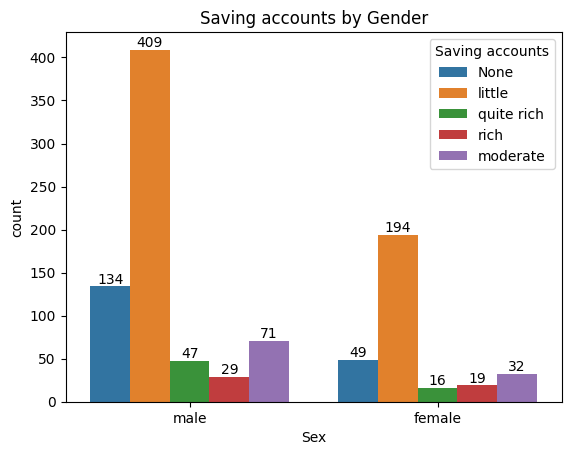

In [24]:
plt.title('Saving accounts by Gender')
ax = sns.countplot(data=df, x='Sex', hue='Saving accounts')
for i in ax.containers:
    ax.bar_label(i, )

Данный график показывает нам распределение сберегательных счетов разного уровня среди мужчин и женщин.
Общее количество счетов у мужчин выше, чем у женщин.
Мы видим что как у мужчин, так и у женщин почти пропорциональные результаты, за исключением счета типа 'quite rich'. Данный тип у мужчин преобладает над типом 'rich'.

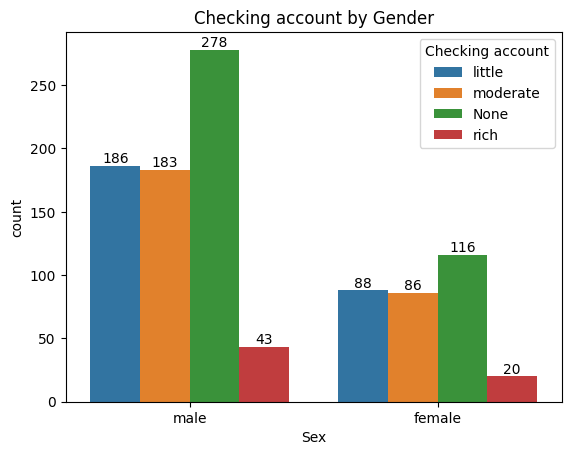

In [25]:
plt.title('Checking account by Gender')
ax = sns.countplot(data=df, x='Sex', hue='Checking account')
for i in ax.containers:
    ax.bar_label(i, )

Данный график отображает состояние текущих счетов клиентов. Все данные пропорциональны. Как видим, очень много клиентов без текущего счета.

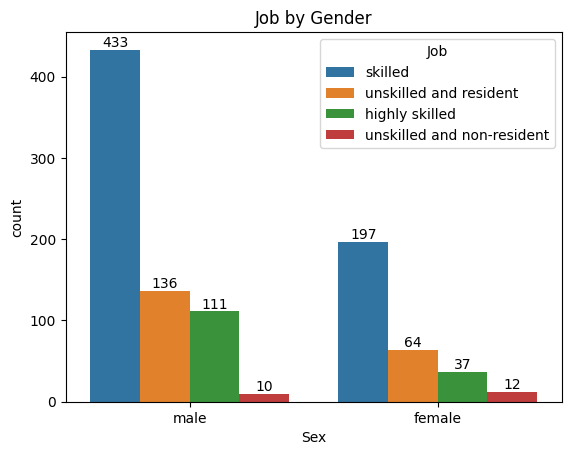

In [26]:
plt.title('Job by Gender')
ax = sns.countplot(data=df, x='Sex', hue='Job')
for i in ax.containers:
    ax.bar_label(i, )

На данном графике отображены клиенты по типу их работы. Заметно большое количество квалифицированных клиентов. На втором месте неквалифицированные клиенты, но являющиеся резидентами. На третьем и четвертом месте соответственно высококвалифицированные клиенты, и неквалифицированные, и не являющиеся резидентами.

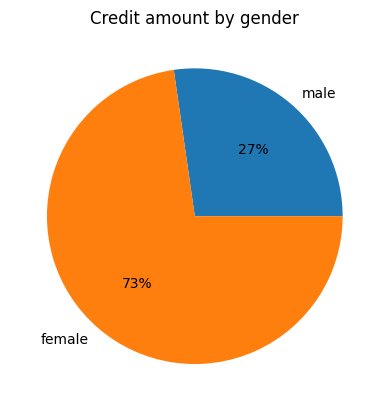

In [58]:
import numpy as np
grb = df.groupby(['Sex'])['Credit amount'].sum()
plt.title('Credit amount by gender')
plt.pie(grb, labels=df['Sex'].unique(), autopct='%.0f%%')
plt.show()

На данной диаграмме мы видим распределение суммы запрашиваемых кредитов среди мужчин и женщин

In [59]:
a = df['Credit amount'].sum()
b = a*0.73
c = round(a-b,2)
a = '{0:_}'.format(a).replace('_', ' ')
b = '{0:_}'.format(b).replace('_', ' ')
c = '{0:_}'.format(c).replace('_', ' ')

In [60]:
f'Общая сумма запрашиваемых кредитов {a} руб'

'Общая сумма запрашиваемых кредитов 3 271 258 руб'

In [61]:
f'Сумма в абсолютных единицах для женщин {b} руб'

'Сумма в абсолютных единицах для женщин 2 388 018.34 руб'

In [62]:
f'Сумма в абсолютных единицах для мужчин {c} руб'

'Сумма в абсолютных единицах для мужчин 883 239.66 руб'

Проверка размера кредита и продолжительности срока кредитования на нормальное распределение при помощи трех гипотез с разными уровняли значимости

In [77]:
alpha_level = pd.DataFrame({'hypothesis': ['normaltest', 'kstest', 'shapiro'],
                  'alpha': [0.01, 0.5, 0.5]})

Уровни значимости:

In [79]:
alpha_level

,hypothesis,alpha
0,normaltest,0.01
1,kstest,0.50
2,shapiro,0.50


In [69]:
stats.normaltest(df['Credit amount'])

NormaltestResult(statistic=396.0421710872409, pvalue=1.0012332136508667e-86)

In [70]:
stats.normaltest(df['Duration'])

NormaltestResult(statistic=156.05412146437033, pvalue=1.2980101391465855e-34)

In [71]:
stats.kstest(df['Credit amount'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [72]:
stats.kstest(df['Duration'], stats.norm.cdf)

KstestResult(statistic=0.9999683287581669, pvalue=0.0)

In [73]:
stats.shapiro(df['Credit amount'])

ShapiroResult(statistic=0.7933971881866455, pvalue=8.609912964372653e-34)

In [74]:
stats.shapiro(df['Duration'])

ShapiroResult(statistic=0.8997893929481506, pvalue=4.908334953558791e-25)

Все гипотезы подтвердили нормальное распространение данных из 'Credit amount' и 'Duration'